# Multi-year IMS Snow Dynamics

In [1]:
import numpy as np
import hvplot.xarray
import xarray as xr

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/DataAccess/Utilities')
import PreProcess_Utils as pputil

sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Modelling/Utilities')
import Snow_Utils as snow_util

In [2]:
from dask.distributed import LocalCluster

cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64354,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:64418,Total threads: 10
Dashboard: http://127.0.0.1:64428/status,Memory: 0 B
Nanny: tcp://127.0.0.1:64357,


2024-10-29 17:25:38,137 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,160 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,162 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,175 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,187 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,194 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,204 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,221 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,235 - distributed.nanny - WARNING - Restarting worker
2024-10-29 17:25:38,245 - distributed.nanny - WARNING - Restarting worker


# Create multi-year snow dynamics dataset

In [3]:
path = r'C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\Alaska\2 IMS\ims_products'
ID = 'winterYear'
names = ['start', 'end', 'length', 'periods', 'status']

In [4]:
%%time
snowDynamics = pputil.uploadGT(path, ID, type = 'ims', names = names)
snowDynamics

CPU times: total: 375 ms
Wall time: 1.64 s


<xarray.Dataset> Size: 207kB
Dimensions:       (x: 47, y: 73, winterYear: 5)
Coordinates:
  * x             (x) float64 376B 4.002e+05 4.012e+05 ... 4.452e+05 4.462e+05
  * y             (y) float64 584B 7.679e+06 7.678e+06 ... 7.608e+06 7.607e+06
    spatial_ref   int64 8B 0
    band          int64 8B 1
  * winterYear    (winterYear) <U9 180B '2018-2019' '2018-2019' ... '2018-2019'
Data variables:
    snow_start    (winterYear, y, x) float32 69kB dask.array<chunksize=(1, 73, 47), meta=np.ndarray>
    snow_end      (winterYear, y, x) float32 69kB dask.array<chunksize=(1, 73, 47), meta=np.ndarray>
    snow_length   (winterYear, y, x) uint16 34kB dask.array<chunksize=(1, 73, 47), meta=np.ndarray>
    snow_periods  (winterYear, y, x) uint8 17kB dask.array<chunksize=(1, 73, 47), meta=np.ndarray>
    snow_status   (winterYear, y, x) uint8 17kB dask.array<chunksize=(1, 73, 47), meta=np.ndarray>

%%time
snowDynamics = pputil.loadXR(snowDynamics)
snowDynamics

# interannualSnowDynamics()

In [6]:
%%time
snowDynamics_i = snow_util.interannualSnowDynamics(snowDynamics,
                                                   min_count = 'half',
                                                   products = names,
                                                   uncertainty = [],
                                                   clearObsPerDay = [],
                                                   type = 'mean',
                                                   implausible_snow = [],
                                                   sd = True,
                                                   quality = False,
                                                   best_value = False,
                                                   verbose = True)
snowDynamics_i

Added snow cover start date to interannual snowDynamics.
Added snow cover end date to interannual snowDynamics.
Added snow cover length to interannual snowDynamics.
Added snow period count to interannual snowDynamics.
Added % years snow-free and with perennial snow to snowDynamics.
CPU times: total: 109 ms
Wall time: 282 ms


<xarray.Dataset> Size: 138kB
Dimensions:          (x: 47, y: 73)
Coordinates:
  * x                (x) float64 376B 4.002e+05 4.012e+05 ... 4.462e+05
  * y                (y) float64 584B 7.679e+06 7.678e+06 ... 7.607e+06
    spatial_ref      int64 8B 0
    band             int64 8B 1
Data variables:
    snow_start_mn    (y, x) float32 14kB -95.6 -95.6 -95.6 ... -111.8 -101.6
    snow_start_sd    (y, x) float32 14kB 5.783 5.783 5.783 ... 10.14 8.518 5.004
    snow_end_mn      (y, x) float32 14kB 152.6 153.4 152.0 ... 152.8 152.8 144.2
    snow_end_sd      (y, x) float32 14kB 5.276 5.713 4.382 ... 13.96 13.96 17.03
    snow_length_mn   (y, x) float32 14kB 246.6 247.4 246.0 ... 261.2 260.0 244.4
    snow_length_sd   (y, x) float32 14kB 12.08 12.85 11.4 ... 10.36 12.13 22.96
    snow_periods_mn  (y, x) float32 14kB 1.2 1.2 1.2 1.2 1.2 ... 1.4 1.4 1.4 1.2
    snow_periods_sd  (y, x) float32 14kB 0.4 0.4 0.4 0.4 ... 0.4899 0.4899 0.4
    pPerennialSnow   (y, x) float32 14kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pSnowFree        (y, x) float32 14kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [8]:
snowDynamics_i.nbytes / 1e9

0.000138216

# Save

In [9]:
%%time
snowDynamics_i['snow_start_mn'].rio.to_raster('IMS_snow_start_mn_1823.tif')
snowDynamics_i['snow_start_sd'].rio.to_raster('IMS_snow_start_sd_1823.tif')
snowDynamics_i['snow_end_mn'].rio.to_raster('IMS_snow_end_mn_1823.tif')
snowDynamics_i['snow_end_sd'].rio.to_raster('IMS_snow_end_sd_1823.tif')
snowDynamics_i['snow_length_mn'].rio.to_raster('IMS_snow_length_mn_1823.tif')
snowDynamics_i['snow_length_sd'].rio.to_raster('IMS_snow_length_sd_1823.tif')
snowDynamics_i['snow_periods_mn'].rio.to_raster('IMS_snow_periods_mn_1823.tif')
snowDynamics_i['snow_periods_sd'].rio.to_raster('IMS_snow_periods_sd_1823.tif')
snowDynamics_i['pPerennialSnow'].rio.to_raster('IMS_pPerennialSnow_1823.tif')
snowDynamics_i['pSnowFree'].rio.to_raster('IMS_pSnowFree_1823.tif')

CPU times: total: 141 ms
Wall time: 369 ms


# Map

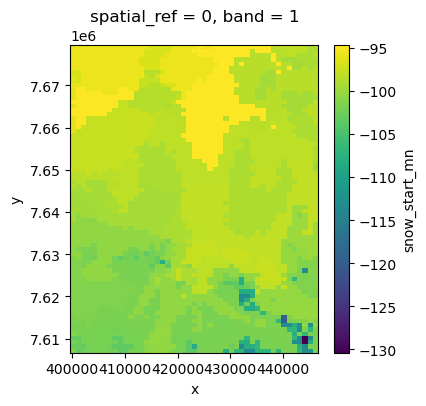

In [11]:
snowDynamics_i['snow_start_mn'].plot(size = 4, aspect = 'equal')

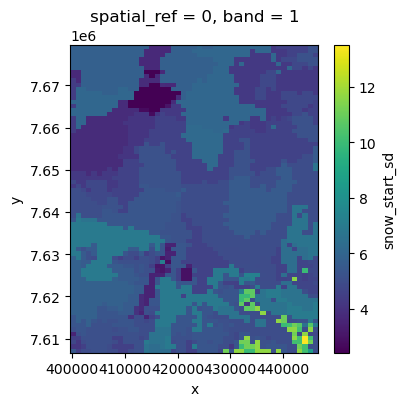

In [13]:
snowDynamics_i['snow_start_sd'].plot(size = 4, aspect = 'equal')

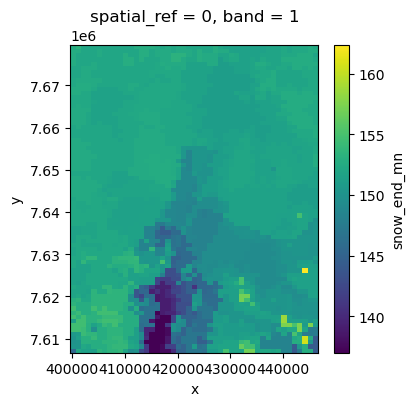

In [14]:
snowDynamics_i['snow_end_mn'].plot(size = 4, aspect = 'equal')

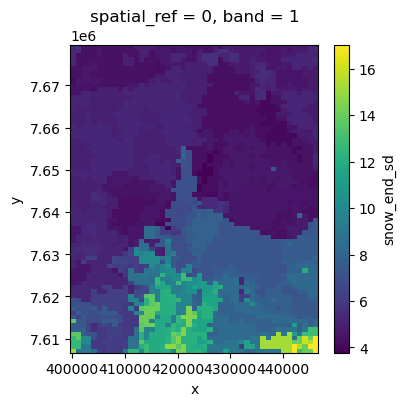

In [15]:
snowDynamics_i['snow_end_sd'].plot(size = 4, aspect = 'equal')

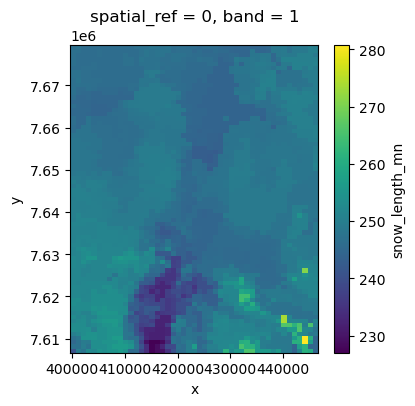

In [16]:
snowDynamics_i['snow_length_mn'].plot(size = 4, aspect = 'equal')

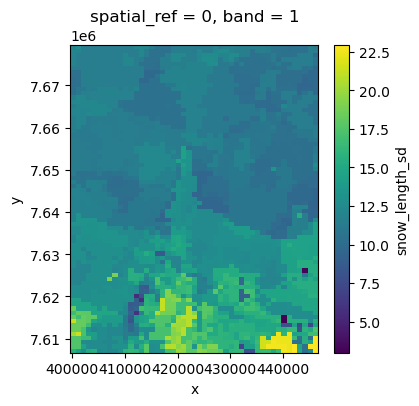

In [17]:
snowDynamics_i['snow_length_sd'].plot(size = 4, aspect = 'equal')

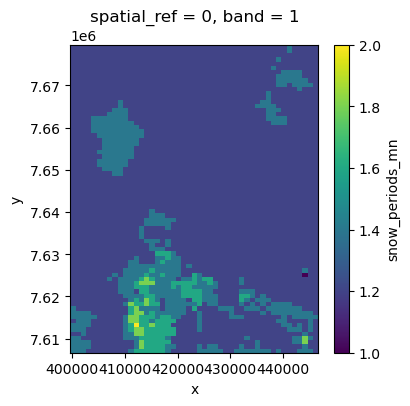

In [18]:
snowDynamics_i['snow_periods_mn'].plot(size = 4, aspect = 'equal')

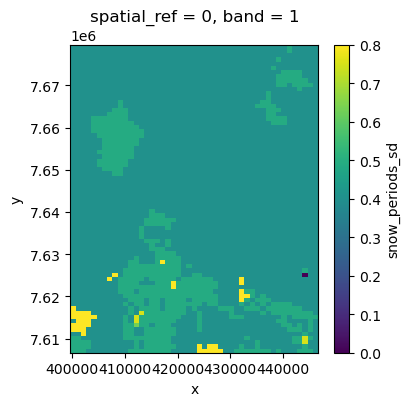

In [19]:
snowDynamics_i['snow_periods_sd'].plot(size = 4, aspect = 'equal')

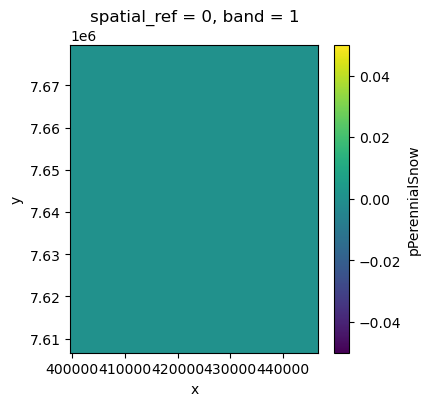

In [20]:
snowDynamics_i['pPerennialSnow'].plot(size = 4, aspect = 'equal')

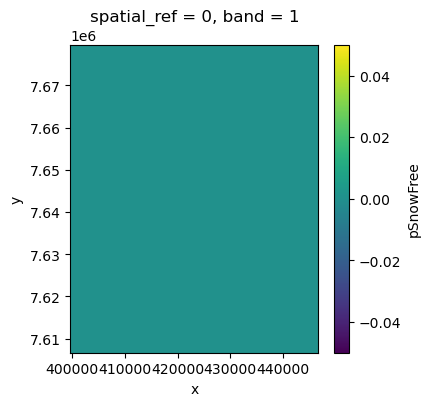

In [21]:
snowDynamics_i['pSnowFree'].plot(size = 4, aspect = 'equal')